# Simple Soil Profile

This package is supposed to be a simple manager for soil profiles. Below we present a complete workflow for creating and parametrizing a soil profile used for a hydrological model. We also use simple plotting methog to visualize the constructed profile.

The idea was that having this package, it is easier to conceptualize the profiles being worked with. Then the parameters added to the profile can be directly saved as relevant inputs to models (for example the SOILPROFILE or SOILHYDRFUNC for SWAP and pySWAP package workflow).

In [1]:
from simplesoilprofile import SoilLayer, SoilProfile, plot_profile

import matplotlib.pyplot as plt
from shapely.geometry import Point

## Layer
The basic building block of a profile is a Layer. It's understood here as a portion of a profile having specific physical and hydraulic properties. Layers also hold information about numerical discratization. We will create a simple profile with 3 layers.

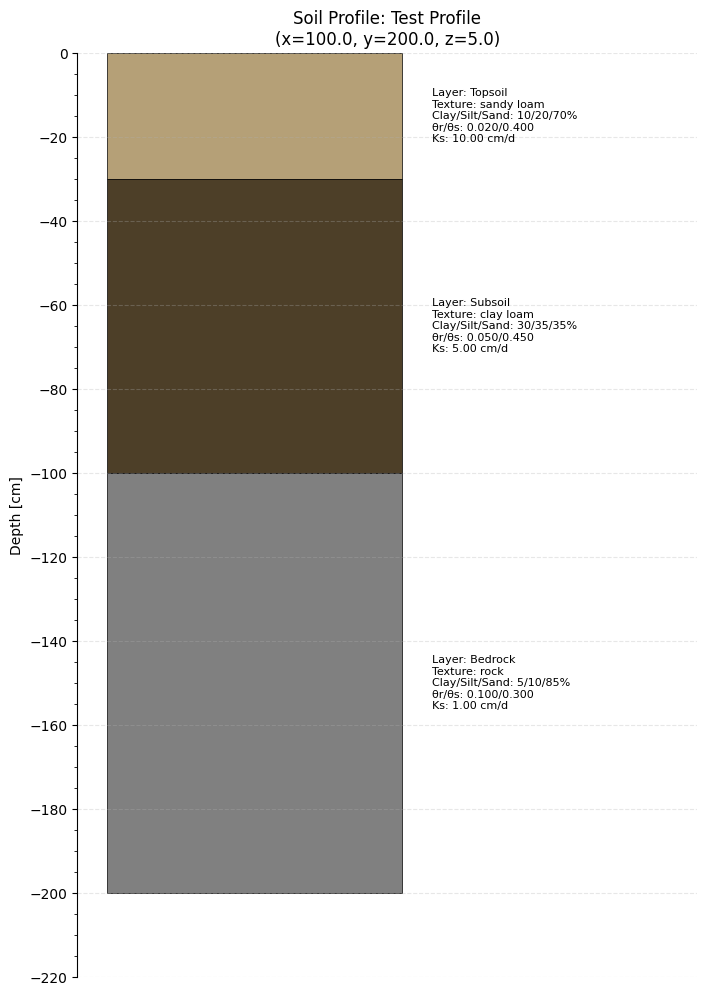

In [2]:
# Create soil layers
topsoil = SoilLayer(
    name="Topsoil",
    theta_res=0.02,
    theta_sat=0.4,
    alpha=0.02,
    n=1.5,
    k_sat=10.0,
    texture_class="sandy loam",
    clay_content=10.0,
    silt_content=20.0,
    sand_content=70.0,
)

subsoil = SoilLayer(
    name="Subsoil",
    theta_res=0.05,
    theta_sat=0.45,
    alpha=0.01,
    n=1.3,
    k_sat=5.0,
    texture_class="clay loam",
    clay_content=30.0,
    silt_content=35.0,
    sand_content=35.0,
)

bedrock = SoilLayer(
    name="Bedrock",
    theta_res=0.1,
    theta_sat=0.3,
    alpha=0.005,
    n=1.2,
    k_sat=1.0,
    texture_class="rock",
    clay_content=5.0,
    silt_content=10.0,
    sand_content=85.0,
)

# Create soil profile
profile = SoilProfile(
    name="Test Profile",
    layers=[topsoil, subsoil, bedrock],
    layer_bottoms=[30, 100, 200],
    location=Point(100.0, 200.0),
    elevation=5.0,
)

# Create plot
fig, ax = plt.subplots(figsize=(8, 12))
plot_profile(profile, ax=ax, show_properties=True)
plt.show()

### Layer discretization
In most models, the conceptual model of the soil column is further divided into compartments between which fluxes are calculated. simplesoilprofile provides several ways to do the discratization automatically. Below we are going to define three LayerDiscretization objects. They are simple objects merely holding the information about the type and parameters of the discretization to be applied to the layer. There are three currently available types:

- Even split - user provides the number of compartments needed and the the H of each compartment is adjusted to fit the required number of sublayers.
- logarythmic split (fine top) - user provide the required number of layer and log density, which when applied creates compartments H logarythmically increasing downwards.
- logarythmic split (fine bottom) - the same as above, but reversed.
- logarythmic split symetrical - the split is done both ways looking from the center. The middle compartments are the biggest and the H of compartments decreases towards the boundaries of the layers.

After creating the discretization configuration and adding it them to the layers we can plot the new profile which now includes the discretization.

In [3]:
from simplesoilprofile.models.discretization import LayerDiscretization, DiscretizationType

even = LayerDiscretization(
        type=DiscretizationType.EVEN,
        num_sublayers=5
    )

log_both = LayerDiscretization(
        type=DiscretizationType.LOG_BOTH,
        num_sublayers=11,
        log_density=3
    )
log_top = LayerDiscretization(
        type=DiscretizationType.LOG_TOP,
        num_sublayers=8,
        log_density=2.0
    )


In [4]:
# Add the discretizations to the layers
topsoil.discretization, subsoil.discretization, bedrock.discretization = even, log_top, log_both

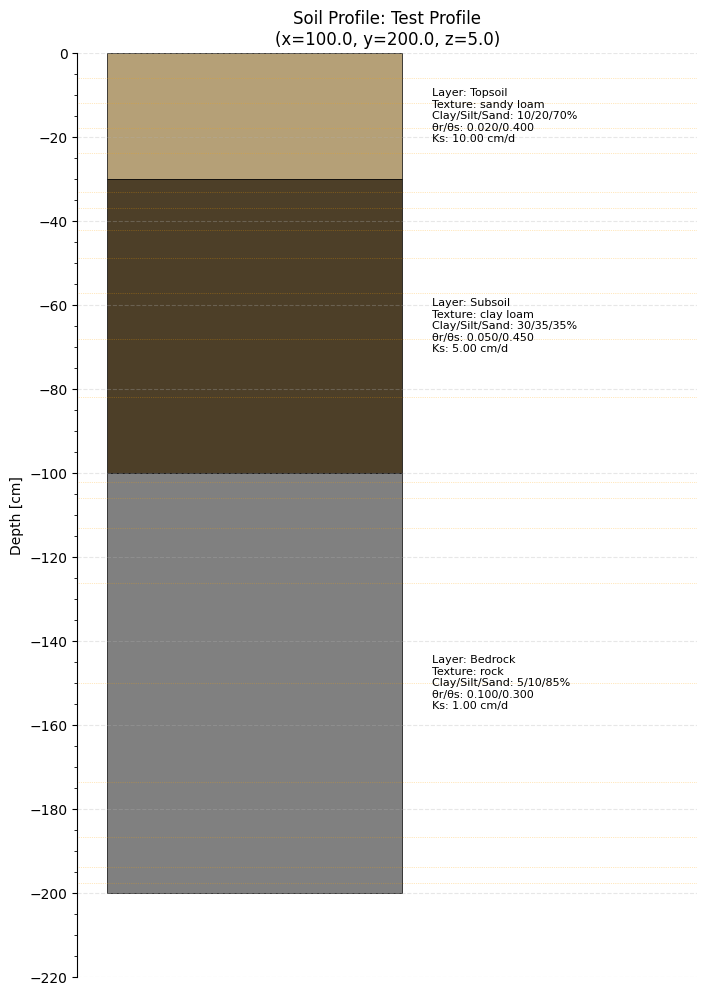

In [5]:
fig, ax = plt.subplots(figsize=(8, 12))
plot_profile(profile, ax=ax, show_properties=True, show_sublayers=True)
plt.show()